## PBS figures


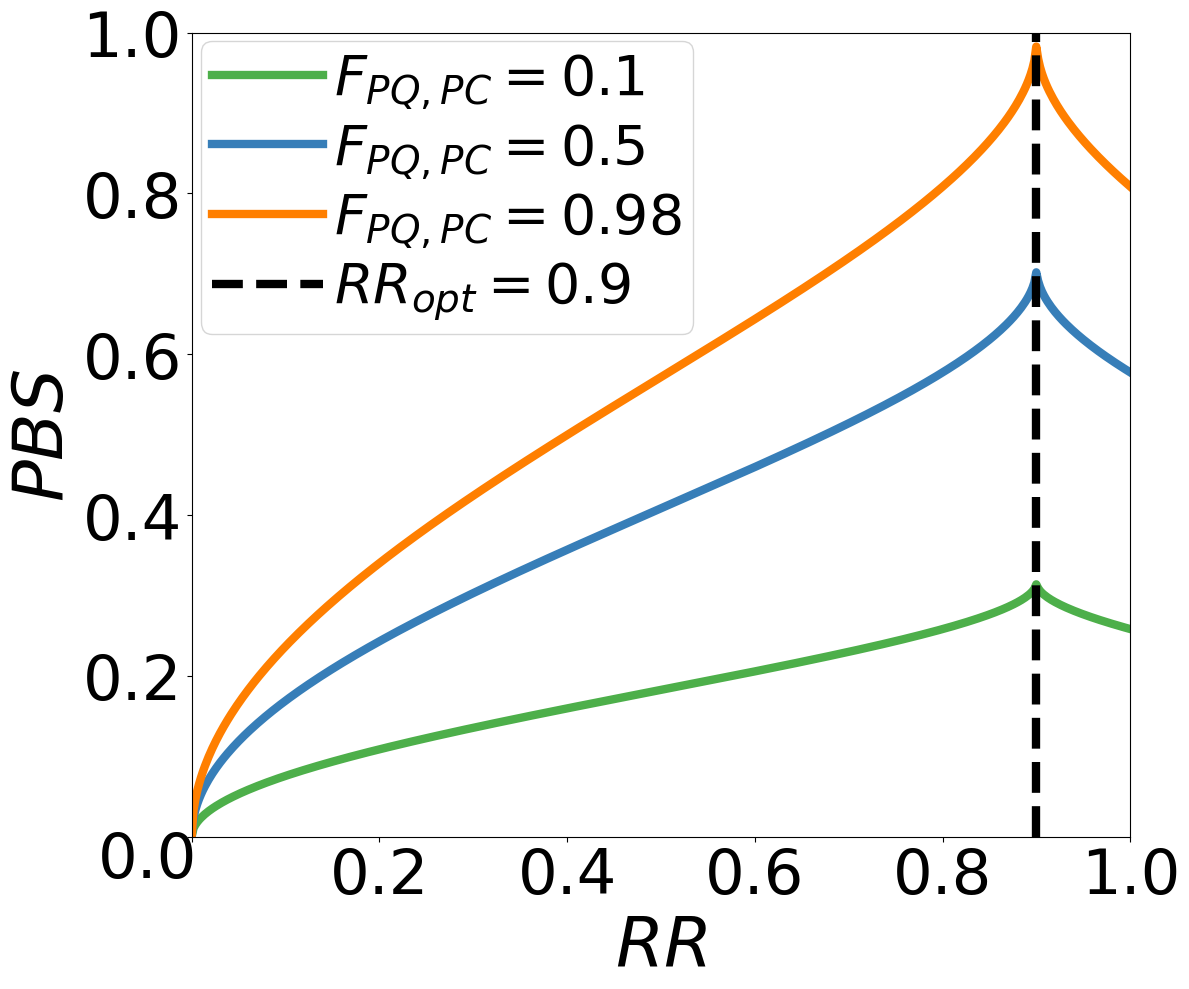

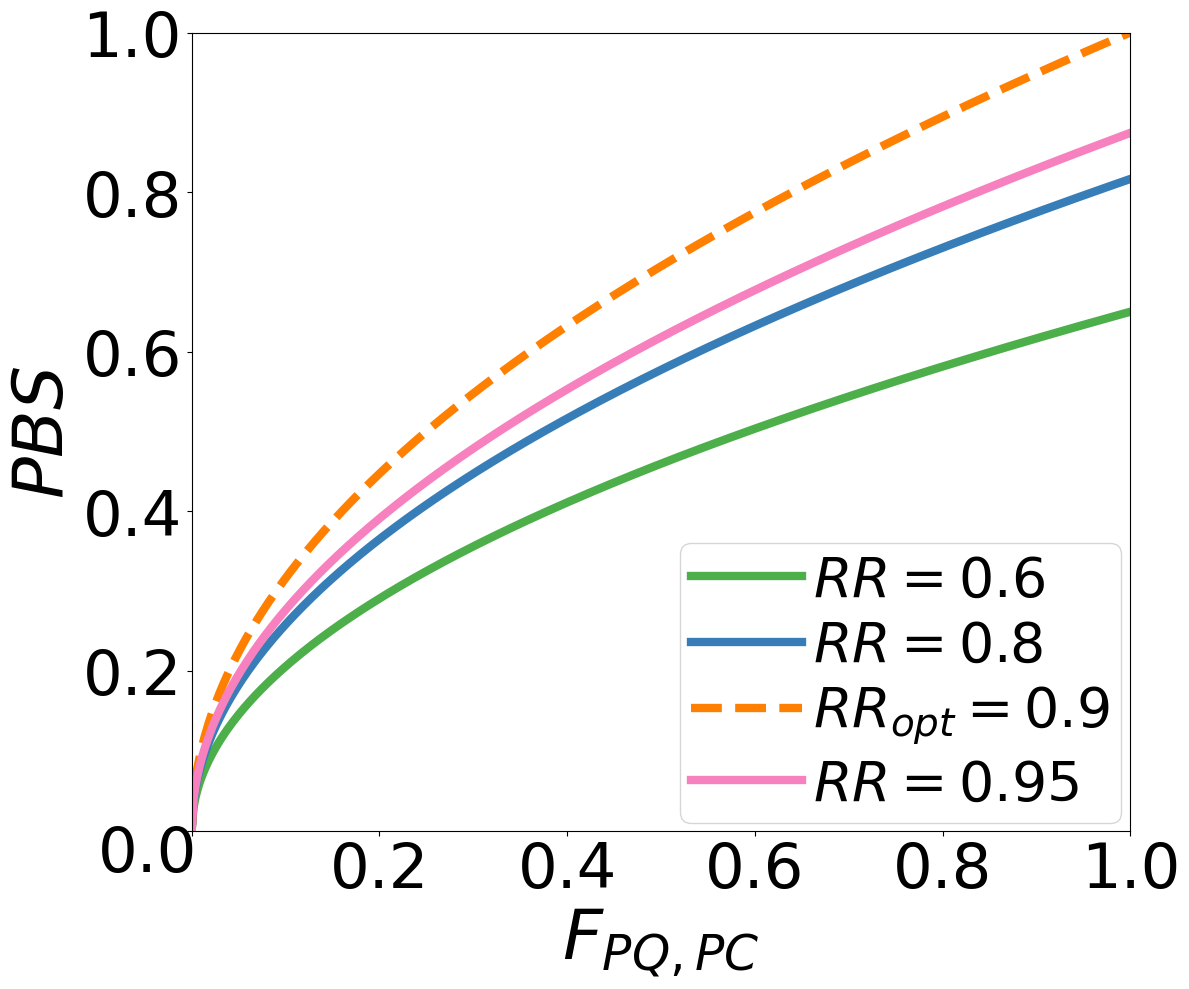

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of F_PQ_PC values from 0 to 1
F_PQ_PC_range = np.linspace(0, 1, 500)

def PBS(F_PQ_PC, RR, RR_opt):
    """
    Calculate the PBS value.

    Args:
        F_PQ_PC (float or array): F_PQ_PC value(s).
        RR (float or array): RR value(s).
        RR_opt (float): Optimal RR value.

    Returns:
        array: Calculated PBS values.
    """
    max_denominator = max(1 - RR_opt, RR_opt)
    term = 1 - np.sqrt(np.abs(RR - RR_opt) / max_denominator)
    term = np.clip(term, 0, None)  # Ensure term is not negative
    return np.sqrt(F_PQ_PC * term)

# Parameters for the plots
RR_opt = 0.9  # Fixed RR_opt value
RR_values = np.linspace(0, 1, 500)  # Range of RR values
F_PQ_PC_values = [0.1, 0.5, 0.98]  # Fixed F_PQ_PC values

# Color-blind-friendly colors
colors = ['#4daf4a', '#377eb8', '#ff7f00', '#f781bf']

# Plot 1: PBS vs. RR for different F_PQ_PC values
plt.figure(figsize=(12, 10))
for idx, F_PQ_PC in enumerate(F_PQ_PC_values):
    PBS_values = PBS(F_PQ_PC, RR_values, RR_opt)
    plt.plot(RR_values, PBS_values, label=f'$F_{{PQ,PC}} = {F_PQ_PC}$', color=colors[idx], linewidth=6)

plt.xlabel('$RR$', fontsize=50)
plt.ylabel('$PBS$', fontsize=50)
plt.axvline(RR_opt, color='black', linestyle='--', label=f'$RR_{{opt}} = {RR_opt}$', linewidth=6)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
plt.legend(fontsize=40, loc='upper left', bbox_to_anchor=(0.01, 0.99), borderaxespad=0, handletextpad=0.2, borderpad=0.2, labelspacing=0.2)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_xticks([0] + list(plt.gca().get_xticks())[1:])
plt.gca().set_xticklabels([''] + [f'{x:.1f}' for x in plt.gca().get_xticks()[1:]])
plt.gca().set_yticks([0] + list(plt.gca().get_yticks())[1:])
plt.gca().set_yticklabels([''] + [f'{y:.1f}' for y in plt.gca().get_yticks()[1:]])
plt.gca().annotate('0.0', xy=(0, 0), xytext=(-0.1, -0.05), textcoords='axes fraction', fontsize=45, ha='left')
plt.tight_layout()
plt.savefig('PBS-RR.pdf')

# Plot 2: PBS vs. F_PQ_PC for different RR values
plt.figure(figsize=(12, 10))
RR_test_values = [0.6, 0.8, RR_opt, 0.95]

for idx, RR in enumerate(RR_test_values):
    PBS_values = PBS(F_PQ_PC_range, RR, RR_opt)
    linestyle = '--' if RR == RR_opt else '-'
    plt.plot(F_PQ_PC_range, PBS_values, label=f'$RR = {RR}$' if RR != RR_opt else f'$RR_{{opt}} = {RR_opt}$', color=colors[idx], linewidth=6, linestyle=linestyle)

plt.xlabel('$F_{PQ,PC}$', fontsize=50)
plt.ylabel('$PBS$', fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
plt.legend(fontsize=40, loc='lower right', bbox_to_anchor=(0.99, 0.01), borderaxespad=0, handletextpad=0.2, borderpad=0.2, labelspacing=0.2)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_xticks([0] + list(plt.gca().get_xticks())[1:])
plt.gca().set_xticklabels([''] + [f'{x:.1f}' for x in plt.gca().get_xticks()[1:]])
plt.gca().set_yticks([0] + list(plt.gca().get_yticks())[1:])
plt.gca().set_yticklabels([''] + [f'{y:.1f}' for y in plt.gca().get_yticks()[1:]])
plt.gca().annotate('0.0', xy=(0, 0), xytext=(-0.1, -0.05), textcoords='axes fraction', fontsize=45, ha='left')
plt.tight_layout()
plt.savefig('PBS-F.pdf')

# Show the plots
plt.show()
